In [89]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# 한글폰트 출력 가능 코드
from matplotlib import rc
#rc('font', family='AppleGothic') # Mac Os
rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

# 군집분석

## K-Means clustering
### 군집 중심점 기반으로 클러스터링
거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐 (PCA 차원축소 적용 할 수도 있음)
이상치 데이터에 취약
https://velog.io/@jhlee508/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-K-%ED%8F%89%EA%B7%A0K-Means-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98


In [103]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)

print(irisDF.shape)
irisDF.head()

(150, 4)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
# n_clusters : 군집화 개수, init : 중심점 좌표설정, max_iter : 최대 반복 회수 이횟수 이전에 모든 데이터의 이동이 없으면 종료
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0,algorithm='auto').fit(iris.data)

kmeans.fit(irisDF)

print(kmeans.labels_)

irisDF['cluster']=kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [105]:
irisDF['target'] = iris.target
iris_result_1= irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result_1)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


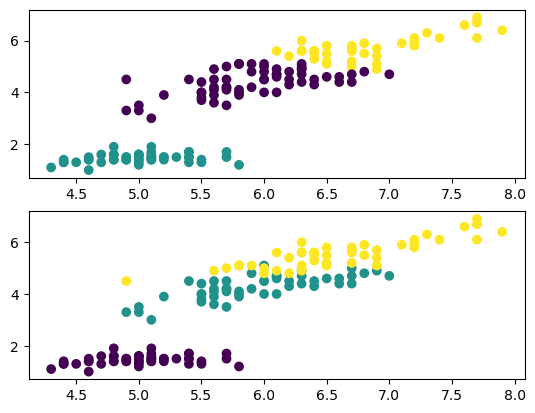

In [106]:
# 군집결과 시각화 
plt.subplot(2,1,1)
plt.scatter(x=irisDF['sepal_length'], y=irisDF['petal_length'], c=irisDF['cluster'])
plt.subplot(2,1,2)
plt.scatter(x=irisDF['sepal_length'], y=irisDF['petal_length'], c=irisDF['target']) 
plt.show()

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


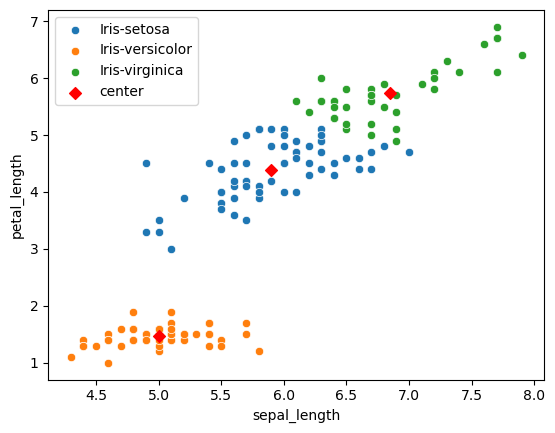

In [107]:
# center는 K-means에서 도출된 각 값에 대한 mean을 의미함.
centers = kmeans.cluster_centers_ 
# 3 by 4로 구성된 행렬로 각 행은 cluster 별 mean을 의미하고 열은 feature 별 mean을 의미함.
print(centers)

# 시각화
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
    sns.scatterplot(x=irisDF.loc[irisDF['cluster']==i]['sepal_length'], y=irisDF.loc[irisDF['cluster']==i]['petal_length'], label=labels[i])
plt.scatter(x=centers[:,0], y=centers[:,2], marker='D', c='r', label='center') 
plt.legend()
plt.show()

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949


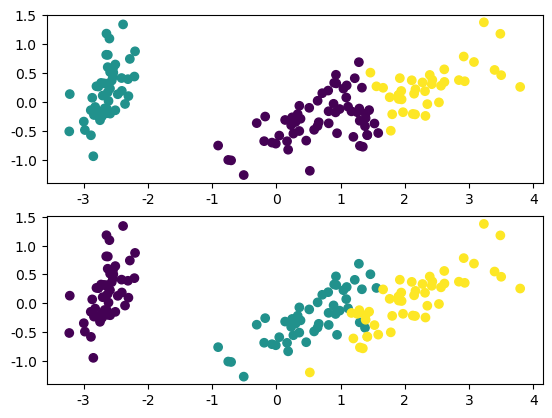

In [109]:
# 군집결과 시각화 
plt.subplot(2,1,1)
plt.scatter(x=irisDF['pca_x'], y=irisDF['pca_y'], c=irisDF['cluster'])
plt.subplot(2,1,2)
plt.scatter(x=irisDF['pca_x'], y=irisDF['pca_y'], c=irisDF['target']) 
plt.show()

# GMM - 거리기반
https://angeloyeo.github.io/2021/02/08/GMM_and_EM.html

In [110]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)


irisDF['target'] = iris.target
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [111]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

In [112]:
irisDF['target'] = iris.target
iris_result= irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


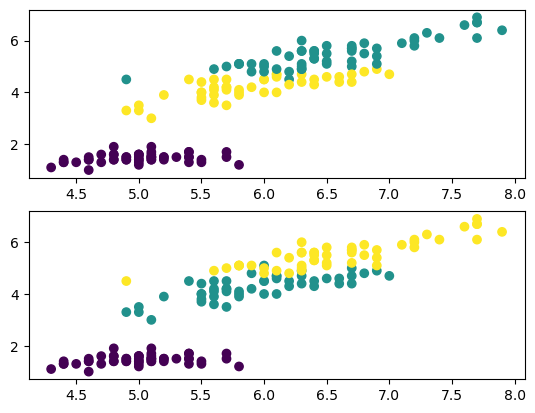

In [113]:
# 군집결과 시각화 
plt.subplot(2,1,1)
plt.scatter(x=irisDF['sepal_length'], y=irisDF['petal_length'], c=irisDF['gmm_cluster'])
plt.subplot(2,1,2)
plt.scatter(x=irisDF['sepal_length'], y=irisDF['petal_length'], c=irisDF['target']) 
plt.show()